In [1]:
import pandas as pd
df = pd.read_csv('data/AAPL_historical_data.csv')

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # invalid dates become NaT
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Optional: Keep only useful columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [4]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [5]:
import talib

# Moving Averages
df['MA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['MA_50'] = talib.SMA(df['Close'], timeperiod=50)

# RSI (Relative Strength Index)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# MACD (Moving Average Convergence Divergence)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

In [6]:
df['Daily_Return'] = df['Close'].pct_change()
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

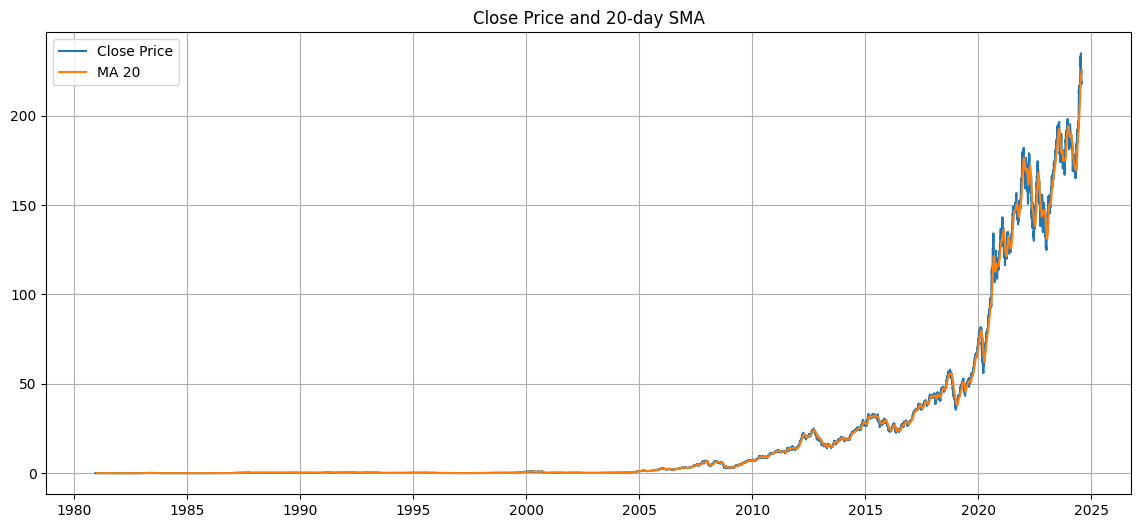

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_20'], label='MA 20')
plt.title('Close Price and 20-day SMA')
plt.legend()
plt.grid(True)
plt.show()

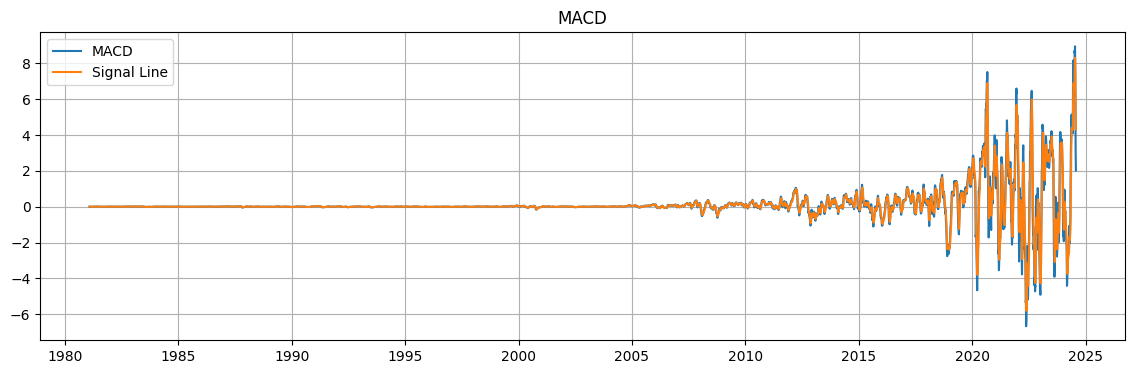

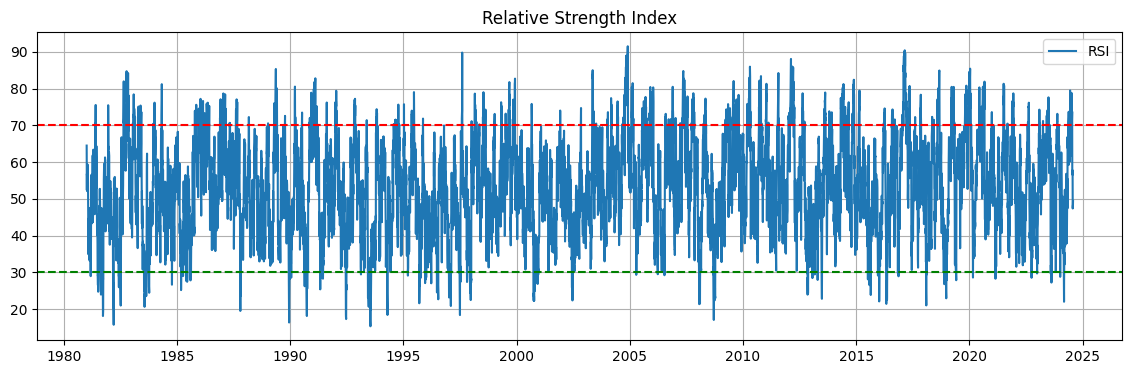

In [8]:
# MACD
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD')
plt.plot(df['MACD_signal'], label='Signal Line')
plt.title('MACD')
plt.legend()
plt.grid(True)
plt.show()

# RSI
plt.figure(figsize=(14, 4))
plt.plot(df['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Date as index and closing price
df_stock = df[['Close']].copy()
df_stock['Daily_Return'] = df_stock['Close'].pct_change()
df_stock = df_stock.dropna()


In [10]:
df_news = pd.read_csv('data_analyst/raw_analyst_ratings.csv')

In [11]:
df_news.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [12]:
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce')  # invalid dates become NaT
df_news = df_news.sort_values('date')
df_news.set_index('date', inplace=True)

In [13]:
df_news.head()

,Unnamed: 0,headline,url,publisher,stock
date,,,,,
2011-04-27 21:01:48-04:00,357064,"ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)",https://www.benzinga.com/etfs/bond-etfs/11/04/...,ETF Professor,DGP
2011-04-28 13:49:29-04:00,437774,A New Regional Emerging Markets ETF,https://www.benzinga.com/etfs/emerging-market-...,Sam Subramanian,ESR
2011-04-28 15:00:36-04:00,350150,Dejour Extends Credit Facility to October 31st...,https://www.benzinga.com/news/11/04/1041764/de...,Theo Kratz,DEJ
2011-04-29 13:47:06-04:00,49280,"ETF Showdown: Crouching Tigers, Hidden ETFs",https://www.benzinga.com/etfs/emerging-market-...,ETF Professor,AIA
2011-04-29 16:11:05-04:00,539428,The GDL Fund to Redeem Its Outstanding 8.50% S...,https://www.benzinga.com/news/11/04/1045464/th...,Benzinga Staff,GDL


In [14]:
from textblob import TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # range: -1 (neg) to 1 (pos)


In [15]:
df_news['sentiment'] = df_news['headline'].apply(get_sentiment)

In [16]:
df_news.head()

,Unnamed: 0,headline,url,publisher,stock,sentiment
date,,,,,,
2011-04-27 21:01:48-04:00,357064,"ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)",https://www.benzinga.com/etfs/bond-etfs/11/04/...,ETF Professor,DGP,0.000000
2011-04-28 13:49:29-04:00,437774,A New Regional Emerging Markets ETF,https://www.benzinga.com/etfs/emerging-market-...,Sam Subramanian,ESR,0.136364
2011-04-28 15:00:36-04:00,350150,Dejour Extends Credit Facility to October 31st...,https://www.benzinga.com/news/11/04/1041764/de...,Theo Kratz,DEJ,0.000000
2011-04-29 13:47:06-04:00,49280,"ETF Showdown: Crouching Tigers, Hidden ETFs",https://www.benzinga.com/etfs/emerging-market-...,ETF Professor,AIA,-0.166667
2011-04-29 16:11:05-04:00,539428,The GDL Fund to Redeem Its Outstanding 8.50% S...,https://www.benzinga.com/news/11/04/1045464/th...,Benzinga Staff,GDL,0.500000


In [18]:
df_sentiment = df_news.groupby('date')['sentiment'].mean().reset_index()
df_sentiment.rename(columns={'sentiment': 'avg_sentiment'}, inplace=True)

In [27]:
# Normalize stock index to date only for merge
df['date'] = df.index.date
df_sentiment = df_sentiment.copy()
df_sentiment['date'] = pd.to_datetime(df_sentiment['date']).dt.date 


In [28]:
df_sentiment.head()

,date,avg_sentiment
0,2011-04-27,0.000000
1,2011-04-28,0.136364
2,2011-04-28,0.000000
3,2011-04-29,-0.166667
4,2011-04-29,0.500000


In [29]:
df_merged = pd.merge(df, df_sentiment, on='date', how='inner')

In [30]:
df_merged.head()

,Open,High,Low,Close,Volume,MA_20,MA_50,RSI_14,MACD,MACD_signal,MACD_hist,Daily_Return,Volatility,RSI,Date,date,avg_sentiment
0,12.580000,12.583929,12.396429,12.505357,356213200,12.158161,12.329350,58.211150,0.040690,-0.039521,0.080211,-0.000771,0.011305,58.211150,2011-04-27,2011-04-27,0.000000
1,12.363929,12.491071,12.340000,12.383929,360959200,12.154804,12.319957,54.237260,0.046491,-0.022319,0.068810,-0.009710,0.011419,54.237260,2011-04-28,2011-04-28,0.136364
2,12.363929,12.491071,12.340000,12.383929,360959200,12.154804,12.319957,54.237260,0.046491,-0.022319,0.068810,-0.009710,0.011419,54.237260,2011-04-28,2011-04-28,0.000000
3,12.385000,12.641071,12.381071,12.504643,1006345200,12.157697,12.310672,57.354088,0.060136,-0.005828,0.065964,0.009748,0.011634,57.354088,2011-04-29,2011-04-29,-0.166667
4,12.385000,12.641071,12.381071,12.504643,1006345200,12.157697,12.310672,57.354088,0.060136,-0.005828,0.065964,0.009748,0.011634,57.354088,2011-04-29,2011-04-29,0.500000


In [31]:
from scipy.stats import pearsonr

# Drop NA (if any)
df_corr = df_merged.dropna(subset=['Daily_Return', 'avg_sentiment'])

# Pearson correlation
corr_coef, p_value = pearsonr(df_corr['Daily_Return'], df_corr['avg_sentiment'])

print(f"Pearson Correlation: {corr_coef:.4f}, p-value: {p_value:.4f}")


Pearson Correlation: -0.0014, p-value: 0.7962


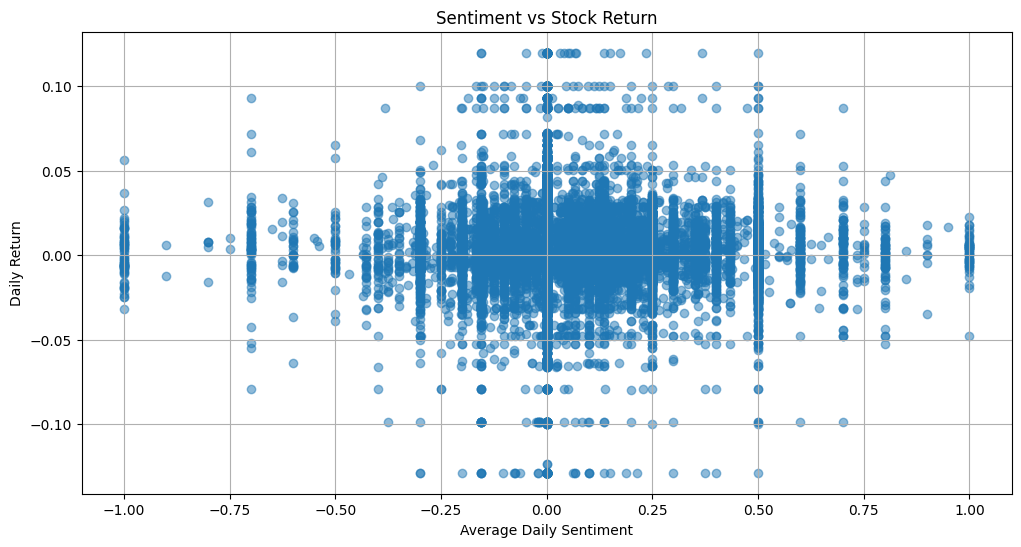

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df_corr['avg_sentiment'], df_corr['Daily_Return'], alpha=0.5)
plt.title("Sentiment vs Stock Return")
plt.xlabel("Average Daily Sentiment")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()
